In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k
 

C:\Users\maikl\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [2]:
import json  

from pprint import pprint 


In [3]:
# Пробное Построчное чтение файла
a = 0
with open('data/mega.json') as f:
    for line in f:
        a += 1
        stroka = line
        if a == 2:
            break

In [4]:
stroka


'{"category": ["Grocery & Gourmet Food", "Cooking & Baking", "Sugar Substitutes", "Xylitol"], "description": ["Shipped from UK, please allow 10 to 21 business days for arrival. ex lib pub by Applied Science Publishers ltd", "Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition."], "title": "Trim Healthy Mama Xylitol", "also_buy": ["B01898YHXK", "B01BCM6LAC", "B00Q4OL47O", "B00Q4OL5QE", "0804189986", "B00Q4OL2F8", "1101902663", "B019PDEUU8", "B01AC97ONO", "B01LZIS4VX", "B019QN2DN8", "B019PDYP7Q", "1101902639", "B00Q4OL0S2", "B019PHEIVA", "B019QNGPSW", "B0041RGD0E", "0998089508", "0988775115", "B0006Z7NNG", "B00MU73UKS", "B01KIJ7JGA", "B005F9W9JQ"], "image": ["https://images-na.ssl-images-amazon.com/images/I/5135fT93xtL._SS40_.jpg", "https://images-na.ssl-images-amazon.com/images/I/21IAIOeQruL._SS40_.jpg"], "rank": "315,867inGroceryGourmetFood(", "main_cat": "Grocery", "asin":

In [5]:
#Построчное чтение , конвертация из Json
a = 0
with open('data/mega.json') as f:
    for line in f:
        a += 1
        stroka = json.loads(line)
        #df = pd.read_json(line, orient='values')
        if a == 22:
            break

In [6]:
# Анализ полученного словаря(строки)
pprint(stroka)

{'also_view': ['B07DKDQVWQ',
               'B01MRQXOVU',
               'B00VQJJVOK',
               'B00G7M8LT2',
               'B01G4H7MJO'],
 'asin': '618205610X',
 'brand': 'Swad',
 'category': ['Grocery & Gourmet Food',
              'Cooking & Baking',
              'Nuts & Seeds',
              'Sesame Seeds'],
 'description': ['Gur Revdi is made by mixing Sesame seeds with jaggery and '
                 'glucose.This is eaten as sweet in many traditional indian '
                 'festivals',
                 'Statements regarding dietary supplements have not been '
                 'evaluated by the FDA and are not intended to diagnose, '
                 'treat, cure, or prevent any disease or health condition.'],
 'main_cat': 'Grocery',
 'price': '$9.28',
 'rank': '173,342inGroceryGourmetFood(',
 'title': 'GUR REWDI - Jaggery Candy with Sesame Seeds 7oz/200g'}


In [7]:
# формирование общего словаря для определения имен будущих столбцов
a = 0
slovar = {}
with open('data/meta_Grocery_and_Gourmet_Food.json') as f:
    for line in f:
        a += 1
        stroka = json.loads(line)
        slovar.update(stroka)
        #df = pd.read_json(line, orient='values')
        #if a == 220000:
            #break

In [8]:
len(slovar)

17

In [9]:
slovar.keys() 

dict_keys(['category', 'description', 'title', 'brand', 'rank', 'also_view', 'main_cat', 'price', 'asin', 'also_buy', 'image', 'date', 'feature', 'details', 'similar_item', 'tech1', 'fit'])

# Анализ для сокращения объема
"категория", "описание", "название", "бренд", "ранг", "также просмотр", "главная кошка", "Цена", "использование", "также покупка", "изображение", "данные", "функция", "детали", "аналогичный товар", "технология 1", "подгонка"


'image' - не нужно

'details'- слишком большой объем

'fit' - - неизвесная информация

Оставляю
['category', 'description', 'title', 'brand',  'rank', 'also_view', 'main_cat', 'price', 'asin', 'also_buy', 'date', 'feature', 'similar_item', 'tech1']


In [10]:
col = ['category', 'description', 'title', 'brand', 'rank', 'also_view', 'main_cat', 'price',
       'asin', 'also_buy', 'date', 'feature', 'similar_item', 'tech1']

In [11]:
for i in col:
    print(i)
    print(slovar[i])
    print()

category
['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Cocktail Mixers', 'Bloody Mary']

description
['McClures Spicy Bloody Mary Mix Pickles, 32 Ounce -- 6 per case. The idea for this product came about as an extra use for the leftover brine from our pickles... now its got its own jar. Vegan, Wheat Free, Dairy Free', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']

title
McClure's Pickles Bloody Mary Mix-Spicy-32 oz | Pack of 1

brand
McClure's

rank
265,258inGroceryGourmetFood(

also_view
['B007JFV6RK', 'B005VS60ZK', 'B01BV8YFYG', 'B00MHB11AS', 'B07FTW1Z9X', 'B00IER0QQO', 'B00CVZD6O4', 'B01D5CDIOO', 'B075DYMNF5']

main_cat
Grocery

price
$18.00

asin
B01HJFRDDA

also_buy
['B00DUF219A', 'B01HJHX9ZO', 'B07K4K26PQ', 'B000H7ENQS', 'B07CVTDKLJ', 'B01K0EQT3M', 'B01GXPRIH8', 'B0199B2HNI', 'B01B02F2I6', 'B002HQG9W8', 'B000YPCEQY', 'B07

In [14]:
# удаляю similar_item, tech1
col = ['category', 'description', 'title', 'brand', 'rank','also_view', 'main_cat', 'price',
       'asin', 'also_buy', 'date', 'feature']

In [15]:
# проверка
for i in col:
    print(i)
    print(slovar[i])
    print()

category
['Grocery & Gourmet Food', 'Beverages', 'Bottled Beverages, Water & Drink Mixes', 'Cocktail Mixers', 'Bloody Mary']

description
['McClures Spicy Bloody Mary Mix Pickles, 32 Ounce -- 6 per case. The idea for this product came about as an extra use for the leftover brine from our pickles... now its got its own jar. Vegan, Wheat Free, Dairy Free', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']

title
McClure's Pickles Bloody Mary Mix-Spicy-32 oz | Pack of 1

brand
McClure's

rank
265,258inGroceryGourmetFood(

also_view
['B007JFV6RK', 'B005VS60ZK', 'B01BV8YFYG', 'B00MHB11AS', 'B07FTW1Z9X', 'B00IER0QQO', 'B00CVZD6O4', 'B01D5CDIOO', 'B075DYMNF5']

main_cat
Grocery

price
$18.00

asin
B01HJFRDDA

also_buy
['B00DUF219A', 'B01HJHX9ZO', 'B07K4K26PQ', 'B000H7ENQS', 'B07CVTDKLJ', 'B01K0EQT3M', 'B01GXPRIH8', 'B0199B2HNI', 'B01B02F2I6', 'B002HQG9W8', 'B000YPCEQY', 'B07

In [16]:
# Предварительное формирование общего df
a = 0
data = []
with open('data/meta_Grocery_and_Gourmet_Food.json') as f:
    for line in f:
        a += 1
        stroka = json.loads(line)
        data.append(stroka)
       
        if a == 10000:
            break
df = pd.DataFrame(data)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      10000 non-null  object
 1   description   8799 non-null   object
 2   title         10000 non-null  object
 3   brand         9509 non-null   object
 4   rank          9631 non-null   object
 5   also_view     5671 non-null   object
 6   main_cat      9998 non-null   object
 7   price         4920 non-null   object
 8   asin          10000 non-null  object
 9   also_buy      2831 non-null   object
 10  image         3451 non-null   object
 11  date          228 non-null    object
 12  feature       418 non-null    object
 13  details       9658 non-null   object
 14  similar_item  17 non-null     object
 15  tech1         5 non-null      object
dtypes: object(16)
memory usage: 1.2+ MB


In [18]:
# не должно быть столбцов(feature,details, similar_item, tech1 - слишком много пропуксков   )

not_column = [ 'image', 'details', 'fit', 'similar_item', 'tech1','date', 'feature']

In [19]:
%%time
# формирование общего df
data = []
with open('data/meta_Grocery_and_Gourmet_Food.json') as f:
    for line in f:
        a += 1
        stroka = json.loads(line)
        # удаление лишних ключей
        [stroka.pop(key, None) for key in not_column]
        
        data.append(stroka)
        
df = pd.DataFrame(data)
       

Wall time: 35.6 s


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287209 entries, 0 to 287208
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     287209 non-null  object
 1   description  251802 non-null  object
 2   title        287205 non-null  object
 3   brand        275787 non-null  object
 4   rank         275494 non-null  object
 5   also_view    121012 non-null  object
 6   main_cat     285716 non-null  object
 7   price        132136 non-null  object
 8   asin         287209 non-null  object
 9   also_buy     83332 non-null   object
dtypes: object(10)
memory usage: 21.9+ MB


In [21]:
train = pd.read_csv('data/train.csv', low_memory=False)

In [22]:
test = pd.read_csv('data/test.csv', low_memory=False)

In [23]:
#Удаление товаров которых нет  в train и test
asin = np.concatenate((train.asin.unique(), test.asin.unique()))
df = df[df.asin.isin(asin)].reset_index(drop=True)

In [24]:
# Удаление дубликатов
df.drop_duplicates(subset = 'asin', inplace = True, ignore_index = True)

In [25]:
df.to_csv("data/meta_Grocery.csv" ,  index_label=False)

In [50]:
df = pd.read_csv("data/meta_Grocery.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41320 entries, 0 to 41319
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     41320 non-null  object
 1   description  37938 non-null  object
 2   title        41320 non-null  object
 3   brand        40895 non-null  object
 4   rank         38879 non-null  object
 5   also_view    22309 non-null  object
 6   main_cat     41237 non-null  object
 7   price        25295 non-null  object
 8   asin         41320 non-null  object
 9   also_buy     29448 non-null  object
dtypes: object(10)
memory usage: 3.5+ MB


In [43]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', 100,'max_colwidth', 1000):
    display(df.head(20))
    

,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
0,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Tea use only the finest tea leaves. These leaves are specially cut to expose more of the juices, then they are curled into tiny beads to seal in more of the flavor. Enjoy a hot cup of Lipton Yellow Label Tea today.', 'Tea', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']",Lipton Yellow Label Tea (loose tea) - 450g,Lipton,"30,937inGroceryGourmetFood(","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY', 'B00N48M0OO', 'B000EM6PC6', 'B000JSSNUC', 'B000HBIHLG', 'B00286KM8E', 'B000VDWJB4', 'B014GLC2LS', 'B00136MKEO', 'B006E9QDXE', 'B000MN630Q', 'B01HIKU16M', 'B01DTSTPDC', 'B004WB7G46', 'B01LOR5QV0', 'B01FV1XCIO', 'B00BOMGIBI', 'B003CJJLYW', 'B01LY2304D', 'B002GWH78S', 'B0748BNCCD', 'B000SATIFA', 'B01LOR5TYY', 'B000F4F94I', 'B00PACC7B8', 'B07FTWRGZ3', 'B00VFYPK82', 'B00C1ZQH86', 'B001QTN5ZG', 'B00YPICDXK', 'B00KPT6JN8', 'B004GCV9ZS', 'B0075NPAMS', 'B00FMGHMKI', 'B003H7KV8Y', 'B00G9NQXZS', 'B00XL1E6QO', 'B000NIHZMU', 'B003XD73NS', 'B008RYNJ9A']",Grocery,$12.46,4639725043,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B002EYZM4O', 'B000JSQK70', 'B00FMTETUQ', 'B001VIIXXQ', 'B002UP153Y', 'B07DZ4M75Z', 'B00N48M0OO', 'B000JSQDK4', 'B000JSQDGS', 'B00NMV6Y4A', 'B01HIKU16M', 'B002GWH78S', 'B002HQQZL8', 'B01KFFT910', 'B007ZI1SKG', '4639725183', 'B004XTDE1G', 'B01GFPS5XW', 'B004WB7G46', 'B000F4F94I', 'B000SARJF6', 'B003H7KV8Y', 'B0198R3EJY', 'B003XD73NS', 'B00FNND76S', 'B06XS3GLWH', 'B00136MKEO', 'B007ZI1UFY', 'B007A2QO3S', 'B00886GV06', 'B002HQEQQ4', 'B00KPT6JN8', 'B002Y1LCNM', 'B00PACC7B8', 'B003CIHTBU', 'B01LY2304D', 'B004TDRASO', 'B000EM6PC6', 'B0757QPXFR', 'B002L2MG5C', 'B000LRH6DQ', 'B000JSSNW0', 'B00JVAZ532', 'B01FV1XCIO', 'B010OP3Q92', 'B006E9QDXE', 'B004GCV9ZS', 'B000JSSNUC', 'B0011010XY', 'B00KKV77GE']"
1,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']","['Lipton Yellow Label Teabags uses a new way to make tea. To lock in as much of the tea taste and aroma as possible, we developed an innovative new process. We press fresh, high quality tea leaves to release their natural essence and we have developed a new blend with this essence. Enjoy a cup of tea with perfect color and taste that reinvigorates you. Shipping weight 14.00 Keywords Search Terms black tea bags Lipton tea bags', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']",Lipton Yellow Label Finest Blend Tea Bags 100 tea bags Pack of 2 (2 x 7 ox / 2 x 200 g),Lipton,"15,487inGroceryGourmetFood(","['B000JSQDK4', 'B007ZI1SKG', 'B00286KM8E', 'B01LY2304D', '4639725043', 'B00BOMGIBI', 'B00CISKNPO', 'B00U9W37QS', 'B003CJJLYW', 'B00KO3O1BC', 'B002YJC990', 'B003CJLNT8', 'B000MQ5YRQ', 'B007ZI1UFY', 'B003D4MYLS', 'B000MXVHCA', 'B00CREXSHY', 'B00YPICDXK', 'B00RZ7EOC6', 'B00UZNYKTE', 'B002EYZM4O', 'B00CREY86Y', 'B00KV586SC', 'B0005XMOI8', 'B001GM60LE', 'B0042IMPTU', 'B01IMWBCFY', 'B001XUFDJ4', 'B0160988SU', 'B0062JSYEW']",Grocery,$12.98,4639725183,"['B000JSQDK4', 'B007ZI1SKG', '4639725043', 'B00KPFHOPO', 'B01LY2304D', 'B00GRS0CAM', 'B00RZ7EOC6', 'B007SH2C6S', 'B000MQ5YRQ', 'B00286KM8E', 'B0005XMOI8', 'B000GG5IYQ', 'B009UQXD90', 'B00BOMGIBI']"
2,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Coffee']","['20 Sachets', 'Empty contents into cup\nPour 8oz of water into cup\nStir and serve', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']",Organo Gold Cafe Supreme 100% 

## Заполнение пропусков и  перераработка в dummy

### 0. rank

In [44]:
# Цикл для определения списка категорий с рангам
df4 = df[df['rank'].isna() == False ]
kategors = []
for index, value in df4['rank'].items():
    sp = value.split('>#')
    if len(sp) > 1:
        
        in_1 = sp[1].find('in') + 2
        in_2 = sp[1].find('(')
        kategor = sp[1][in_1:in_2].strip().replace(' ', '').replace('&', '')
        if kategor not in kategors and len(kategor) < 30:
            kategors.append(kategor)
       
    else:
        
        stroka = value
        in_1 = stroka.find('in') + 2
        in_2 = stroka.find('(')
        kategor = stroka[in_1:in_2]
        if kategor not in kategors and len(kategor) < 30:
            kategors.append(kategor)
        


In [45]:
kategors

['GroceryGourmetFood',
 'KitchenDining',
 'HealthHousehold',
 'BeautyPersonalCare',
 'Patio,LawnGarden',
 'SportsOutdoors',
 'ToolsHomeImprovement',
 'ToysGames',
 'PetSupplies',
 'IndustrialScientific',
 'OfficeProducts',
 'Arts,CraftsSewing',
 'MusicalInstruments',
 'Electronics',
 'Software',
 'CameraPhoto']

In [51]:
# Формирование таблицы с рангами
ranks  = pd.DataFrame(index = df.index, columns = kategors)
df1 = df.copy()
df1['rank'].fillna(0, inplace = True)
for index, value in df1['rank'].items():
    if value != 0:
    
        sp = value.split('>#')
        if len(sp) > 1:
            #print(sp[1])
            in_1 = sp[1].find('in') + 2
            in_2 = sp[1].find('(')
            kategor = sp[1][in_1:in_2].strip().replace(' ', '').replace('&', '')

            if kategor in kategors and len(kategor) < 30:
                #ranks[kategor].iloc[index] = float(sp[1][:(in_1 - 2)].replace(',', '.'))
                cifra = sp[1][:(in_1 - 2)]
                if len(cifra) < 9:
                    ranks[kategor].iloc[index] = float(cifra.replace(',', '.'))
                else:
                    cifras = cifra[:3].replace(',', '') + cifra[3:].replace(',', '.')
                    ranks[kategor].iloc[index] = float(cifras)
            
        else:
            
            stroka = value
            in_1 = stroka.find('in') + 2
            in_2 = stroka.find('(')
            kategor = stroka[in_1:in_2]
            if (kategor in kategors) and (len(kategor) < 30) and (in_1 != -1) :
                cifra = stroka[:(in_1 - 2)]
                if len(cifra) < 9:

                    ranks[kategor].iloc[index] = float(cifra.replace(',', '.'))
                else:
                    cifras = cifra[:3].replace(',', '') + cifra[3:].replace(',', '.')
                    ranks[kategor].iloc[index] = float(cifras)

            


In [60]:
# Заполнение пропусков, проверка не обработанных значений условием ((len(kategor) < 30) and (in_1 != -1))
ranks.fillna(0, inplace= True)
s = ranks.sum(1)
x = s[s == 0].count()
y = df['rank'].isnull().sum()
print(f'Количество не обработанных значений {x-y}')

Количество не обработанных значений 56


Приемлемо

### 1. main_cat 

In [63]:
# Функция для заполнения main_cat первым значением из столбца 'category'

def fillna_cat(df_c):
    if df_c['main_cat'] == 0:
        cat = df_c['category'][2:-2].split("', '")[0].split(' ')[0]
        return cat
    else:
        return df_c['main_cat']

In [64]:
df['main_cat'].fillna(0, inplace= True)

In [65]:
df['main_cat'] = df.apply(lambda x: fillna_cat(x), axis=1)

In [66]:
df.main_cat.nunique()

17

### 2. price

In [67]:
df[df.price.isna() == True ].describe()

,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
count,16025,14721,16025,15688,13876,11106,16025,0,16025,8310
unique,998,14296,15987,4620,13714,10890,17,0,16025,8022
top,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",['Our mission is to be the leader in importing...,Alvita Caffeine Free Alfalfa Leaf Tea - 24 Tea...,produce aisle,"87,841inGroceryGourmetFood(",['B07G348HYR'],Grocery,NaN,B001DF2UMW,['B07CX6LN8T']
freq,666,15,4,239,3,10,15431,NaN,1,61


In [68]:
df['price'].head(2)

0    $12.46
1    $12.98
Name: price, dtype: object

#### Пробую сразу
```python
df['price'] = df[df.price.isna() == False ]['price'].apply(lambda x: float(x[1:]))
```
#### Получаю ошибку:
ValueError: could not convert string to float: '9.97 - $137.08'

In [69]:
df[df['price'].str.contains('- ', na=False)]

,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
2020,"['Grocery & Gourmet Food', 'Candy & Chocolate'...",['Dubble Bubble gumballs in a 53oz resealable ...,"Dubble Bubble Gumball Refill, 8 Flavors, 3.3 lbs",Dubble Bubble,"119,068inSportsOutdoors(",NaN,Grocery,$9.97 - $137.08,B000F3Q6W8,NaN
3977,"['Grocery & Gourmet Food', 'Candy & Chocolate'...",['Make snack time sweet with TWIZZLERS Twists....,"Twizzlers Licorice Candy, Strawberry, 5 Pound",Twizzlers,NaN,NaN,Grocery,$12.47 - $109.99,B000NMI7RI,NaN
6116,"['Grocery & Gourmet Food', 'Cooking & Baking',...","[""This versatile egg white substitute is bette...",Wilton Meringue Powder,NaN,"97,173inSportsOutdoors(","['B000ZEIR6U', 'B000ZNOVCA', 'B07KRNB474', 'B0...",Amazon Home,$19.49 - $36.50,B000ZEIR6U,NaN
7137,"['Grocery & Gourmet Food', 'Cooking & Baking',...",['Great Kraft quality in a convenient package:...,"Kraft Honey Single Serve Pouch, 9 g. Packets (...",Kraft,NaN,NaN,Grocery,$20.08 - $43.41,B001652KD8,NaN
9555,"['Grocery & Gourmet Food', 'Dairy, Cheese & Eg...",['No fillers'],Kraft Grated Parmesan Cheese-24 oz,Kraft,NaN,NaN,Grocery,$9.88 - $32.00,B001H8R00M,NaN
...,...,...,...,...,...,...,...,...,...,...
39599,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...","['Intensity: Decaffeinated Intenso 7, Arpeggio...",Nespresso OriginalLine Capsules: Decaffeinated...,NaN,"10,144inSportsOutdoors(","['B0099HD3YA', 'B0711SNH3L', 'B00URXM6FM', 'B0...",Sports & Outdoors,$38.00 - $42.99,B01B4WR02I,"['B0052M5V0A', 'B073ZGWN12', 'B00DB1Q7W0', 'B0..."
40441,"['Grocery & Gourmet Food', 'Breakfast Foods', ...",NaN,Kellogg's Breakfast Cereal,Kellogg Cereal Variety,NaN,NaN,Grocery,$8.98 - $33.25,B01E6OL3RO,NaN
40587,"['Grocery & Gourmet Food', 'Cooking & Baking',...","['great tasting cashews, almonds, pistachios, ...",Kirkland Signature Extra Fancy Unsalted Mixed ...,Kirkland Signature,"98,223inSportsOutdoors(","['B00PPKSZO8', 'B00MW8L7BY', 'B07BYGF2WG', 'B0...",Grocery,$24.99 - $172.31,B01ERYRF66,NaN
40769,"['Grocery & Gourmet Food', 'Cooking & Baking',...",['Domino Granulated Pure Cane Sugar is extra f...,Domino Pure Cane Sugar 4lb,Domino,"163,703inSportsOutdoors(","['B00HJCXX24', 'B01FE8BLNC', 'B018Y0WYHY', 'B0...",Grocery,$17.15 - $160.00,B01FG5W2KE,NaN


In [70]:
# Беру первое значение из price  для заполнения price
def one(strok):
    if ' - ' in strok:
        ind = strok.index(' - ',1)
        return strok[0:ind]
    else:
        return strok

In [71]:
# Применяю функцию и перевожу в тип float
df['price'] = df[df.price.isna() == False ]['price'].apply(one)

df['price'] = df[df.price.isna() == False ]['price'].apply(lambda x: float(x[1:]))

In [72]:
# Список категорий для поиска среднего для каждой категории
categori = list(df.main_cat.unique())

In [73]:
# Анализ
a = 0
for cat in categori:
    sr = df[(df.price.isna() == False) & (df.main_cat == cat)].price.mean()
    print(f'{a}, {cat}')
    print(sr)
    
    if a >11:
        with pd.option_context('display.max_rows', 100, 'display.max_columns', 100,'max_colwidth', 1000):
            display(df[df.main_cat == cat])
    a += 1

0, Grocery
21.167574155652215
1, Amazon Home
13.63821727019494
2, Health & Personal Care
19.69138820638819
3, All Beauty
14.931214953271038
4, Sports & Outdoors
21.691568627450984
5, Toys & Games
12.175428571428572
6, Pet Supplies
24.298333333333332
7, Industrial & Scientific
29.72875
8, Office Products
20.784583333333337
9, Tools & Home Improvement
21.913333333333338
10, Baby
8.245000000000001
11, Arts, Crafts & Sewing
13.436666666666667
12, Musical Instruments
nan


,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
19835,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Green']","[""The Martin Smith 1/2 Size Classical Guitar Package is an excellent choice for a young beginner looking to learn the guitar. Popular with schools, these classical guitars include superb nylon strings which produce a fantastic bright sound. Suitable for ages between 5 and 8, this guitar package comes in 6 amazing colours, and also includes a gig bag and deluxe guitar strap, providing you with everything you'll need to start playing straight away. Offering great quality at an affordable price, the Martin Smith Classical Guitar Pack is ideal for any young aspiring musician. Pack Contents: 1/2 Size Martin Smith Classical Guitar, Gig Bag, Deluxe Guitar Strap""]",Martin Smith Classical Guitar 34 Inches 1/2 Size Natural,Martin Smith,">#244,562 in Musical Instruments (See Top 100 in Musical Instruments)>#638 in Musical Instruments > Guitars > Classical & Nylon-String Guitars>#7,669 in Home & Kitchen > Kitchen & Dining > Coffee, Tea & Espresso > Coffee & Tea > Tea > Green",['B005F25DUU'],Musical Instruments,NaN,B0079VKTSQ,NaN


13, Home Audio & Theater
nan


,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
21083,"['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Coffee Substitutes']",NaN,Magnetic False Eyelashes [FREE MIRROR] Full Eye Kit - Natural Length Magnet Lashes - Dual Magnets - Fake Lashes Set - [Medium/Large] (Black),Nylea,">#159,408 in Electronics (See Top 100 in Electronics)>#592 in Grocery & Gourmet Food > Beverages > Coffee, Tea & Cocoa > Coffee Substitutes",NaN,Home Audio & Theater,NaN,B008UT14VM,NaN


14, Software
nan


,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
27479,"['Grocery & Gourmet Food', 'Dried Beans, Grains & Rice', 'Grains & Rice']",['Get Started in CAD with DesignCAD:\xa0 DesignCAD is a versatile and easy-to-use 2D CAD program.'],DESIGNCAD V22 (2D CAD PROGRAM),IMSI,"2,890inSoftware(","['3959828233', 'B071F35R8W', 'B07F1D535L', 'B01C9Q9T2W', 'B06WRW16RF', 'B07CZ8L2FY', 'B077NRMPD7', 'B07JB5BFKK', 'B079M2XVQL', 'B079M2VVTD', 'B000I6O020', 'B006ZB941O', 'B00W0ET4AG', 'B07CNWHPZG', 'B07F7TRH3M', 'B000WL0PUM', 'B07C12V56B', 'B007WAKJHU', 'B001TAJP2E', '1546518282', 'B07D24Q2C1', 'B01HAP3NJM', 'B06WRR3ZTP', 'B0789GQN9P', 'B07BQD8VYK', '1880301032', 'B079NZ225T', 'B06Y3DQ7ZQ', 'B0042X78Z6']",Software,NaN,B00FCZHEAW,"['B00W0ET4AG', '3959828233', 'B007WAKJHU']"


15, Cell Phones & Accessories
nan


,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
34991,"['Grocery & Gourmet Food', 'Food & Beverage Gifts', 'Candy & Chocolate Gifts']","['SUCONOR Apple Watch Wireless Charger Ingenious Combination: Prefect charging for Apple Watch and Qi-enabled phone. Enjoy the convenience of wireless charger with SUCONOR Apple Watch Wireless Charger! Easy using and Compact: Simply placing your devices and begin charging instantly. Built-in Magnetic Charging Module aligns your Apple Watch magnetically. Compact and elegant make it suitable for bedroom and office usage. Compatible Devices: -2W charging for Apple Watch Series 1/2/3 -10W Fast Charging for Samsung Galaxy S9 / S9 Plus / S8 / S8+ /Note8 / Note5 / S7 / S7 edge / S6 edge+ -7.5W Fast Charging for iPhone X / 8 / 8 Plus -5W Charging for other android Qi-Enabled Devices Specifications: -Color: black-Input: DC5V / 2A, DC9V / 1.67A -Output: 2W/5W / 7.5W / 10W Note: 1. Using QC3.0 or QC2.0 Wall Adapter. Using QC3.0 Adapter can shorten the charging time and improve charging efficiency. 2. Please check and avoid placing any metal attachments or any cases thicker than 0.3 inches. 3...","Wireless Charger Compatible for Apple Watch/iPhone, SUCONOR 2 in 1 Qi Ultra-Thin Wireless Charger Compatible for iPhone X/XS / XR/XS MAX / 8/8 Plus, Apple Watch Series 1/2/3/4 (T06)",SUCONOR,">#362,024 in Grocery & Gourmet Food (See Top 100 in Grocery & Gourmet Food)>#3,894 in Grocery & Gourmet Food > Candy & Chocolate > Candy & Chocolate Gifts>#12,308 in Grocery & Gourmet Food > Food & Beverage Gifts",NaN,Cell Phones & Accessories,NaN,B00SLWZY3W,NaN


16, Camera & Photo
nan


,category,description,title,brand,rank,also_view,main_cat,price,asin,also_buy
40398,"['Grocery & Gourmet Food', 'Cooking & Baking', 'Nuts & Seeds', 'Mixed Nuts']",['1'],"Cosyzone Windshield Sunshade 6 Pieces Car Sun Shade Side Rear Window Shades UV Rays Sun Visor Protector, Keeps Vehicle Cooler",Cosyzone,">#20,388 in Camera & Photo (See top 100)>#497 in Grocery & Gourmet Food > Cooking & Baking > Nuts & Seeds > Mixed Nuts>#5,895 in Grocery & Gourmet Food > Snack Foods > Nuts & Seeds>#9,400 in Grocery & Gourmet Food > Produce",NaN,Camera & Photo,NaN,B01E4GD3P4,"['B001PB4LR6', 'B01E0A5NZW', 'B00DT73KZ8', 'B00FPSTFPS', 'B07C59Q8WR', 'B01DONO9WO', 'B01HH79Y0U']"


In [74]:
# Редкие категории объединяю в одну
# Заменю название категори и заполню значение price средним

def fillna_cat(df_c):
    if df_c['main_cat'] in categori[12:]:
        cat = 'other'
        return cat
    else:
        return df_c['main_cat']

df['main_cat'] = df.apply(lambda x: fillna_cat(x), axis=1)

sr = df[df.price.isna() == False ]['price'].mean()

def fillna_price(df_c):
    if df_c['main_cat'] == 'other':
        
        return sr
    else:
        return df_c['price']
    
df['price'] = df.apply(lambda x: fillna_price(x), axis=1)



In [75]:
categori = list(df.main_cat.unique())
categori

['Grocery',
 'Amazon Home',
 'Health & Personal Care',
 'All Beauty',
 'Sports & Outdoors',
 'Toys & Games',
 'Pet Supplies',
 'Industrial & Scientific',
 'Office Products',
 'Tools & Home Improvement',
 'Baby',
 'Arts, Crafts & Sewing',
 'other']

In [76]:
%%time
# Заполняю price средним по категории


sr = {}
for cat in categori:
    sr[cat] = df[(df.price.isna() == False) & (df.main_cat == cat)]['price'].mean()

df['price'].fillna(0, inplace= True)
    
def fillna_price(df_c):
    global sr
    
    if df_c['price'] == 0:
        sred =   sr[df_c['main_cat']]
        return sred
    else:
        return df_c['price']
    
df['price'] = df.apply(lambda x: fillna_price(x), axis=1)



Wall time: 1.13 s


In [77]:
#Анализ 
df.price.value_counts(bins = 200)

(19.99, 24.985]      18530
(10.0, 14.995]        6127
(5.005, 10.0]         4692
(14.995, 19.99]       3978
(24.985, 29.98]       2296
                     ...  
(509.495, 514.49]        0
(504.5, 509.495]         0
(499.505, 504.5]         0
(989.01, 994.005]        0
(494.51, 499.505]        0
Name: price, Length: 200, dtype: int64

In [78]:
#Заполнение price категориями
df['price_cat1'] = pd.cut(df[df.price<130].price, 300, labels=list(range(1,301))).astype(int)

df['price_cat2'] = pd.cut(df[df.price >= 130].price, 4, labels=list(range(301,305))).astype(int)

df['price_cat2'].fillna(0, inplace= True) 
df['price_cat1'].fillna(0, inplace= True)
df['price_cat'] = (df['price_cat2']+df['price_cat1']).astype(int)

In [79]:
price_cat = df['price_cat']
price_cat

0        29
1        30
2        69
3        49
4        32
         ..
41315    34
41316    26
41317    49
41318    28
41319    26
Name: price_cat, Length: 41320, dtype: int32

price_cat = pd.get_dummies(df['price_cat'], prefix='pricecat')
#price_cat

price_cat

#Заполняю веса
for col in price_cat.columns:
    ves = int(col.split('_')[1])
    price_cat[col] = price_cat[col].apply(lambda x: x*ves)
price_cat

 ### 3. category и main_cat

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41320 entries, 0 to 41319
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     41320 non-null  object 
 1   description  37938 non-null  object 
 2   title        41320 non-null  object 
 3   brand        40895 non-null  object 
 4   rank         38879 non-null  object 
 5   also_view    22309 non-null  object 
 6   main_cat     41320 non-null  object 
 7   price        41320 non-null  float64
 8   asin         41320 non-null  object 
 9   also_buy     29448 non-null  object 
 10  price_cat1   41320 non-null  float64
 11  price_cat2   41320 non-null  float64
 12  price_cat    41320 non-null  int32  
dtypes: float64(3), int32(1), object(9)
memory usage: 4.3+ MB


In [81]:
json.loads(df.category.iloc[0].replace("\'", "\""))

['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Black']

In [82]:
# Получаю общий список всех категорий
spisok = []
for index, value in df.category.items():
    #print(value)
    l = value.replace("\"", "\'").replace("['", "[\"").replace("', '", "\", \"").replace("']", "\"]")
    b = json.loads(l)
    for i in b:
        if i not in spisok:
            spisok.append(i)
len(spisok)    
       

1003

In [83]:
# Получаю словарь с количетвом каждой категории
A = {}
for index, value in df.category.items():
    #print(value)
    l = value.replace("\"", "\'").replace("['", "[\"").replace("', '", "\", \"").replace("']", "\"]")
    b = json.loads(l)
    for i in b:
        if i  in spisok:
            count = A.get(i,0)
            A[i] = count + 1


In [86]:
# Получение списка категорий которые встречаются 150 и более раз
categor = pd.Series(A).to_frame().reset_index()
categor.columns= ['categorys', 'count']
categorys_150 = list(categor[categor['count'] >= 150].categorys)


In [88]:
# получаем таблицу категорий встречающихся 150 и более раз для каждого товара
categorys = pd.DataFrame(index = df.index, columns = categorys_150)
for index, value in df.category.items():
    #print(value)
    l = value.replace("\"", "\'").replace("['", "[\"").replace("', '", "\", \"").replace("']", "\"]")
    b = json.loads(l)
    for i in b:
        if i  in categorys_150:
            categorys[i].iloc[index] = 1

In [89]:
categorys.columns = categorys.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(',', '')
categorys.fillna(0, inplace= True)

In [90]:
#возьмем main_cat
main_cats = pd.get_dummies(df['main_cat'], prefix='main_cat')
main_cats.columns = main_cats.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(',', '')
main_cats

,main_cat_all_beauty,main_cat_amazon_home,main_cat_arts_crafts_&_sewing,main_cat_baby,main_cat_grocery,main_cat_health_&_personal_care,main_cat_industrial_&_scientific,main_cat_office_products,main_cat_pet_supplies,main_cat_sports_&_outdoors,main_cat_tools_&_home_improvement,main_cat_toys_&_games,main_cat_other
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41315,0,0,0,0,1,0,0,0,0,0,0,0,0
41316,0,0,0,0,1,0,0,0,0,0,0,0,0
41317,0,0,0,0,1,0,0,0,0,0,0,0,0
41318,0,0,0,0,1,0,0,0,0,0,0,0,0


### 4. also_view (заменю таблицей с количеством)

In [91]:
df.iloc[0].also_view

"['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B002EYZM4O', 'B01282ULWY', 'B000JSQDGS', 'B00886E4K0', 'B002YJC990', 'B000JSQDK4', 'B001VIIXXQ', '4639725183', 'B007ZI1SKG', 'B002UP153Y', 'B007ZI1UFY', 'B00N48M0OO', 'B000EM6PC6', 'B000JSSNUC', 'B000HBIHLG', 'B00286KM8E', 'B000VDWJB4', 'B014GLC2LS', 'B00136MKEO', 'B006E9QDXE', 'B000MN630Q', 'B01HIKU16M', 'B01DTSTPDC', 'B004WB7G46', 'B01LOR5QV0', 'B01FV1XCIO', 'B00BOMGIBI', 'B003CJJLYW', 'B01LY2304D', 'B002GWH78S', 'B0748BNCCD', 'B000SATIFA', 'B01LOR5TYY', 'B000F4F94I', 'B00PACC7B8', 'B07FTWRGZ3', 'B00VFYPK82', 'B00C1ZQH86', 'B001QTN5ZG', 'B00YPICDXK', 'B00KPT6JN8', 'B004GCV9ZS', 'B0075NPAMS', 'B00FMGHMKI', 'B003H7KV8Y', 'B00G9NQXZS', 'B00XL1E6QO', 'B000NIHZMU', 'B003XD73NS', 'B008RYNJ9A']"

In [94]:
# Функция для подсчета количества товаров в ячейке also_view
df['also_view'].fillna(0, inplace= True)
def view(df_w):
    if (type(df_w.also_view) != str):
        return df_w.also_view
    
    else:
        sp = df_w['also_view'][2:-2].split(', ')
        return len(sp)
df['also_view_count'] = df.apply(lambda x: view(x), axis=1)

In [95]:
also_view = df['also_view_count']

### 5. also_buy (аналогично)

In [96]:

df['also_buy'].fillna(0, inplace= True)
def view(df_w):
    if (type(df_w.also_buy) != str):
        return df_w.also_buy
    
    else:
        sp = df_w['also_buy'][2:-2].split(', ')
        return len(sp)
df['also_buy_count'] = df.apply(lambda x: view(x), axis=1)

In [97]:
also_buy = df['also_buy_count']

### brand

In [98]:
# Выбираю 30 самых часто втречаемых брендов
s = df.brand.value_counts()
s[s>30].count()


197

In [99]:
sr = list(s[s>30].index)
# 'Unknown'

In [100]:
def drand_mean(df_c):
    global sr
    
    if df_c['brand'] in sr:
        return df_c['brand']
    else:
        return 'Unknown'
    
df['brand_cat'] = df.apply(lambda x: drand_mean(x), axis=1)


In [101]:
brand_cat = pd.get_dummies(df['brand_cat'], prefix='brandcat')

brand_cat.columns = brand_cat.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(',', '')
brand_cat

,brandcat_a_great_surprise,brandcat_ahmad_tea,brandcat_albanese,brandcat_alvita,brandcat_amoretti,brandcat_amy's,brandcat_anna_and_sarah,brandcat_annie's_homegrown,brandcat_anthony's,brandcat_arrowhead_mills,...,brandcat_van_houtte,brandcat_walden_farms,brandcat_we_got_nuts,brandcat_wholesome_sweeteners,brandcat_wild_foods,brandcat_wilton,brandcat_yankeetraders,brandcat_yogi,brandcat_zatarain's,brandcat_produce_aisle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### COO матрица

In [102]:

df = df[['asin']]

In [103]:
df_coo = pd.concat([df, also_view, price_cat, also_buy, main_cats, brand_cat, categorys, ranks], axis = 1)

In [104]:
df_coo

,asin,also_view_count,price_cat,also_buy_count,main_cat_all_beauty,main_cat_amazon_home,main_cat_arts_crafts_&_sewing,main_cat_baby,main_cat_grocery,main_cat_health_&_personal_care,...,ToolsHomeImprovement,ToysGames,PetSupplies,IndustrialScientific,OfficeProducts,"Arts,CraftsSewing",MusicalInstruments,Electronics,Software,CameraPhoto
0,4639725043,53,29,53,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4639725183,30,30,14,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5463213682,39,69,52,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9742356831,58,49,55,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B00004S1C5,7,32,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41315,B01HJ2OFYI,0,34,91,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41316,B01HJ4FWGG,56,26,88,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41317,B01HJ7QPKU,5,49,59,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41318,B01HJCUNOO,0,28,39,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
df_asin = pd.concat([train[['asin', 'itemid']], test[['asin', 'itemid']]])

In [111]:
mapper = dict(zip(df_asin.asin,df_asin.itemid))
df_coo['itemid'] = df_coo.asin.apply(lambda x: mapper[x])

In [112]:
df_coo.index =df_coo.itemid

In [113]:
df_coo

,asin,also_view_count,price_cat,also_buy_count,main_cat_all_beauty,main_cat_amazon_home,main_cat_arts_crafts_&_sewing,main_cat_baby,main_cat_grocery,main_cat_health_&_personal_care,...,ToysGames,PetSupplies,IndustrialScientific,OfficeProducts,"Arts,CraftsSewing",MusicalInstruments,Electronics,Software,CameraPhoto,itemid
itemid,,,,,,,,,,,,,,,,,,,,,
1,4639725043,53,29,53,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0,4639725183,30,30,14,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5463213682,39,69,52,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,9742356831,58,49,55,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,B00004S1C5,7,32,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38319,B01HJ2OFYI,0,34,91,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38319
38320,B01HJ4FWGG,56,26,88,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38320
38321,B01HJ7QPKU,5,49,59,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38321


In [114]:
df_coo_m= df_coo.drop(['asin', 'itemid'], axis=1)

df_coo_m.to_csv("./data/df_coo.csv" ,  index_label=False)

df_coo_m = pd.read_csv("data/df_coo.csv")

sparse.coo_matrix(df_coo_m)

<41320x355 sparse matrix of type '<class 'numpy.float64'>'
	with 355703 stored elements in COOrdinate format>

### Предсказание рейтинга на случайном лесе

In [115]:
# найду среднию оценку из файла train
reting = pd.DataFrame(train.groupby(['itemid']).overall.mean()) 
reting['itemid']  = reting.index
reting = reting.reset_index(drop=True)

In [116]:
reting

,overall,itemid
0,4.875000,0
1,4.190476,1
2,4.857143,2
3,4.581081,3
4,4.400000,4
...,...,...
41297,4.000000,41315
41298,4.666667,41316
41299,4.250000,41317
41300,5.000000,41318


In [117]:
# использую только те товары которые есть в train
df_coo_mod = df_coo[df_coo.itemid.isin(reting.itemid)]

In [118]:
df_coo_mod = df_coo_mod.reset_index(drop=True)


In [119]:
df_coo_mod = df_coo_mod.merge(reting, on = 'itemid', how='left')

In [120]:
df_coo_mod 

,asin,also_view_count,price_cat,also_buy_count,main_cat_all_beauty,main_cat_amazon_home,main_cat_arts_crafts_&_sewing,main_cat_baby,main_cat_grocery,main_cat_health_&_personal_care,...,PetSupplies,IndustrialScientific,OfficeProducts,"Arts,CraftsSewing",MusicalInstruments,Electronics,Software,CameraPhoto,itemid,overall
0,4639725043,53,29,53,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.190476
1,4639725183,30,30,14,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.875000
2,5463213682,39,69,52,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.857143
3,9742356831,58,49,55,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.581081
4,B00004S1C5,7,32,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41297,B01HJ2OFYI,0,34,91,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38319,4.285714
41298,B01HJ4FWGG,56,26,88,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38320,4.285714
41299,B01HJ7QPKU,5,49,59,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38321,4.400000
41300,B01HJCUNOO,0,28,39,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38322,4.333333


In [126]:
Y = round(df_coo_mod.overall).astype(str) ##  
X = df_coo_mod.drop(['overall', 'asin', 'itemid'],axis=1,) #

In [127]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 

In [128]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)



model = RandomForestRegressor(n_estimators=300, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.2s finished


In [129]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


MAE: 0.5185722073738418


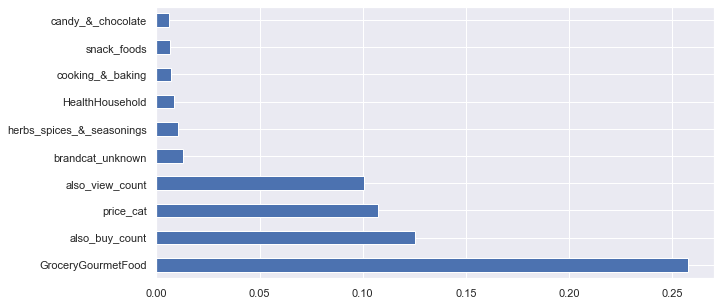

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Возможно качество признаков товаров не улучшит рекомендательную систему